In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
elorating = pd.read_csv('EloRatings.csv')
matches = pd.read_csv('Matches.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19704\3723045496.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  matches = pd.read_csv('Matches.csv')


In [64]:
# Check missing values in elorating
print("Missing values in elorating:")
print(elorating.isnull().sum())

# Check missing values in matches
print("\nMissing values in matches:")
print(matches.isnull().sum())

Missing values in elorating:
date       0
club       0
country    0
elo        0
dtype: int64

Missing values in matches:
Division            0
MatchDate           0
MatchTime      131485
HomeTeam            0
AwayTeam            0
HomeElo         78483
AwayElo         78522
Form3Home        1500
Form5Home        1500
Form3Away           0
Form5Away           0
FTHome              3
FTAway              3
FTResult            3
HTHome          54580
HTAway          54580
HTResult        54580
HomeShots      115822
AwayShots      115819
HomeTarget     116628
AwayTarget     116625
HomeFouls      116584
AwayFouls      116584
HomeCorners    116194
AwayCorners    116194
HomeYellow     111259
AwayYellow     111258
HomeRed        111258
AwayRed        111260
OddHome          3030
OddDraw          3030
OddAway          3030
MaxHome         27635
MaxDraw         27635
MaxAway         27635
Over25          82159
Under25         82160
MaxOver25       82159
MaxUnder25      82160
HandiSize       7382

In [65]:
# Drop columns with too many missing values (e.g., >50%) in matches
threshold = 0.5  # Drop columns with more than 50% missing values
matches_cleaned = matches.dropna(thresh=len(matches) * threshold, axis=1)

# Fill missing numeric values with 0 in matches_cleaned
numeric_columns = matches_cleaned.select_dtypes(include=['float64', 'int64']).columns
matches_cleaned[numeric_columns] = matches_cleaned[numeric_columns].fillna(0)

# Fill missing categorical values with "Unknown" in matches_cleaned
categorical_columns = matches_cleaned.select_dtypes(include=['object']).columns
matches_cleaned[categorical_columns] = matches_cleaned[categorical_columns].fillna("Unknown")

# Verify cleaned datasets
print("\nColumns in matches_cleaned:")
print(matches_cleaned.columns)
print("\nColumns in elorating:")
print(elorating.columns)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19704\1333758447.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_cleaned[numeric_columns] = matches_cleaned[numeric_columns].fillna(0)



Columns in matches_cleaned:
Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo',
       'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeYellow', 'AwayYellow',
       'HomeRed', 'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome',
       'MaxDraw', 'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25',
       'HandiSize', 'HandiHome', 'HandiAway'],
      dtype='object')

Columns in elorating:
Index(['date', 'club', 'country', 'elo'], dtype='object')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_19704\1333758447.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_cleaned[categorical_columns] = matches_cleaned[categorical_columns].fillna("Unknown")


In [66]:
# Convert 'date' to datetime format in elorating
elorating['date'] = pd.to_datetime(elorating['date'])

## Distribution of Elo Ratings

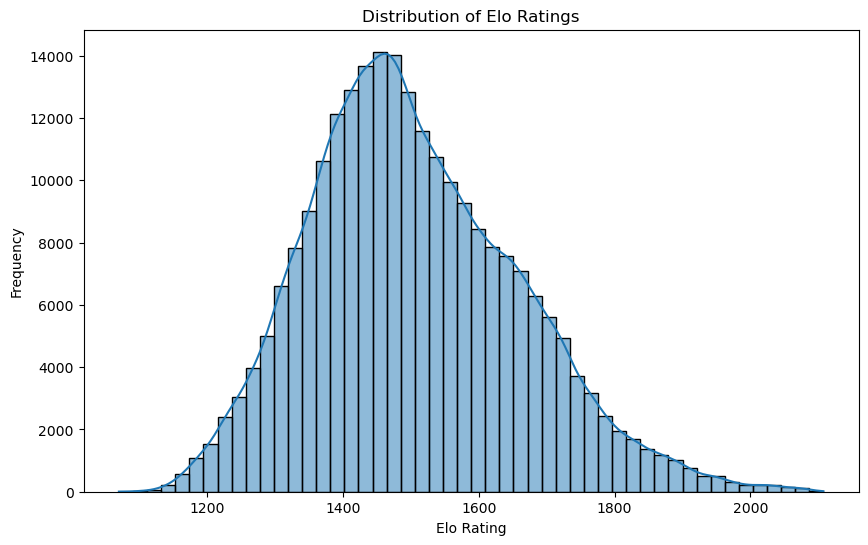

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(elorating['elo'], bins=50, kde=True)
plt.title('Distribution of Elo Ratings')
plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.show()


Top 10 Clubs by Elo Rating:
             date           club country      elo
115065 2012-04-15      Barcelona     ESP  2107.48
120426 2012-11-01      Barcelona     ESP  2104.12
134066 2014-03-15  Bayern Munich     GER  2101.50
149021 2015-09-15      Barcelona     ESP  2100.68
135568 2014-05-01    Real Madrid     ESP  2098.62
134480 2014-04-01  Bayern Munich     GER  2097.45
153898 2016-03-15      Barcelona     ESP  2096.97
120017 2012-10-15      Barcelona     ESP  2096.34
133652 2014-03-01  Bayern Munich     GER  2094.76
148615 2015-09-01      Barcelona     ESP  2094.00


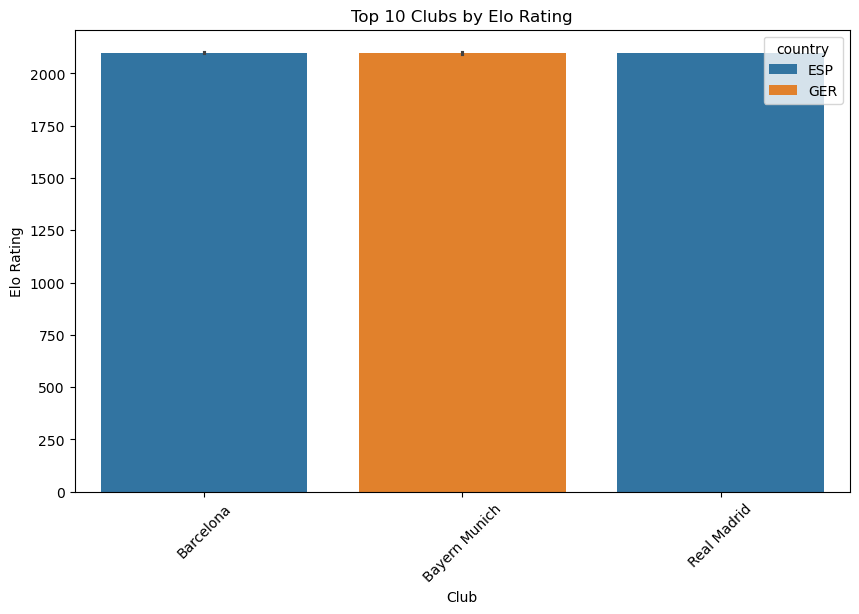

In [71]:
top_clubs = elorating.sort_values(by='elo', ascending=False).head(10)
print("\nTop 10 Clubs by Elo Rating:")
print(top_clubs[['date', 'club', 'country', 'elo']])

plt.figure(figsize=(10, 6))
sns.barplot(x=top_clubs['club'], y=top_clubs['elo'], hue=top_clubs['country'], dodge=False)
plt.title('Top 10 Clubs by Elo Rating')
plt.xlabel('Club')
plt.ylabel('Elo Rating')
plt.xticks(rotation=45)
plt.show()

## Average Elo Ratings by Country¶


Top 10 Countries by Average Elo Rating:
country
ESP    1643.631849
ENG    1596.407745
GER    1582.698852
ITA    1553.130912
FRA    1543.574262
POR    1519.778283
RUS    1515.864793
NED    1487.867696
TUR    1471.378682
BEL    1458.889859
Name: elo, dtype: float64


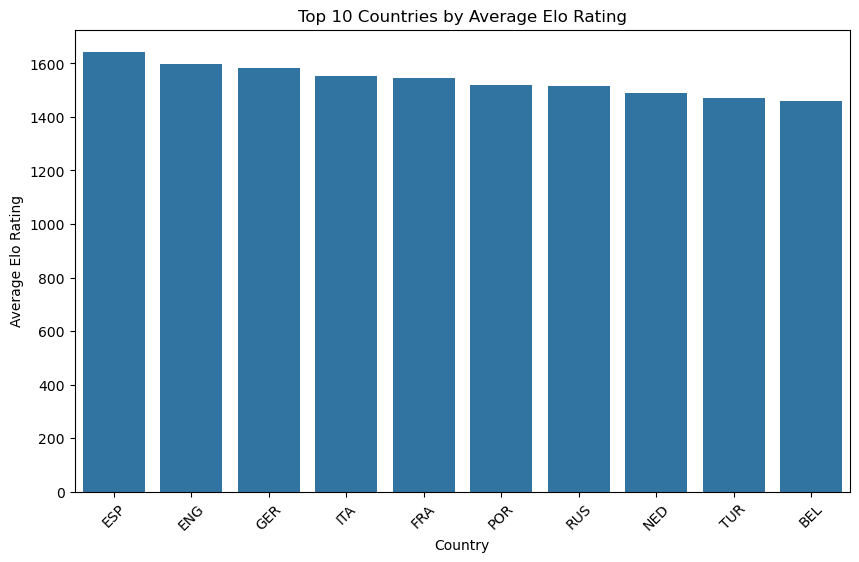

In [73]:
avg_elo_by_country = elorating.groupby('country')['elo'].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Average Elo Rating:")
print(avg_elo_by_country.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_elo_by_country.head(10).index, y=avg_elo_by_country.head(10).values)
plt.title('Top 10 Countries by Average Elo Rating')
plt.xlabel('Country')
plt.ylabel('Average Elo Rating')
plt.xticks(rotation=45)
plt.show()

## Elo Rating Trends Over Time¶

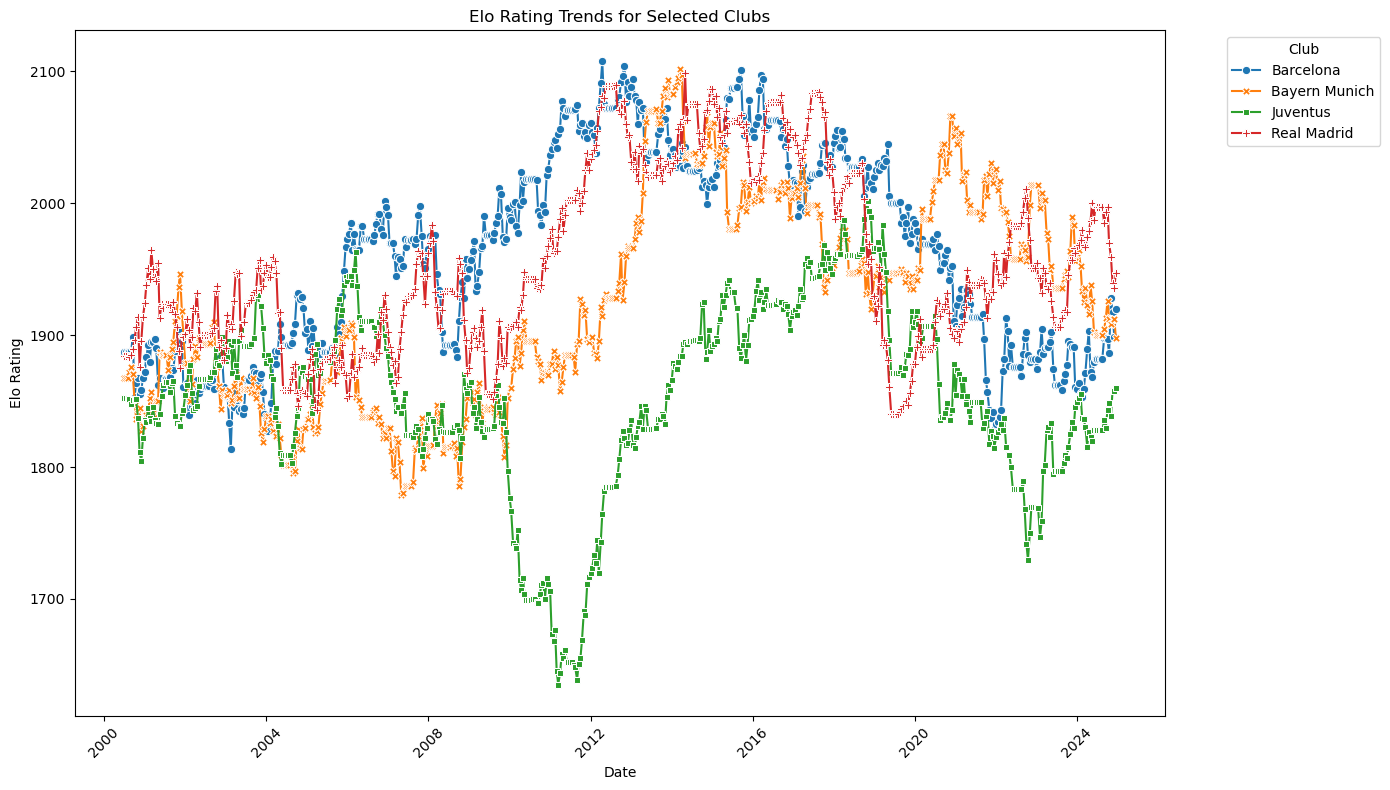

In [77]:
# List of clubs to compare
clubs_to_compare = ['Barcelona', 'Real Madrid', 'Manchester United', 'Bayern Munich', 'Juventus']

# Filter elorating data for the selected clubs
club_data = elorating[elorating['club'].isin(clubs_to_compare)]

# Plot Elo rating trends for the selected clubs
plt.figure(figsize=(14, 8))
sns.lineplot(data=club_data, x='date', y='elo', hue='club', style='club', markers=True, dashes=False)
plt.title('Elo Rating Trends for Selected Clubs')
plt.xlabel('Date')
plt.ylabel('Elo Rating')
plt.xticks(rotation=45)
plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Elo Rating Distribution by Country (Boxplot)

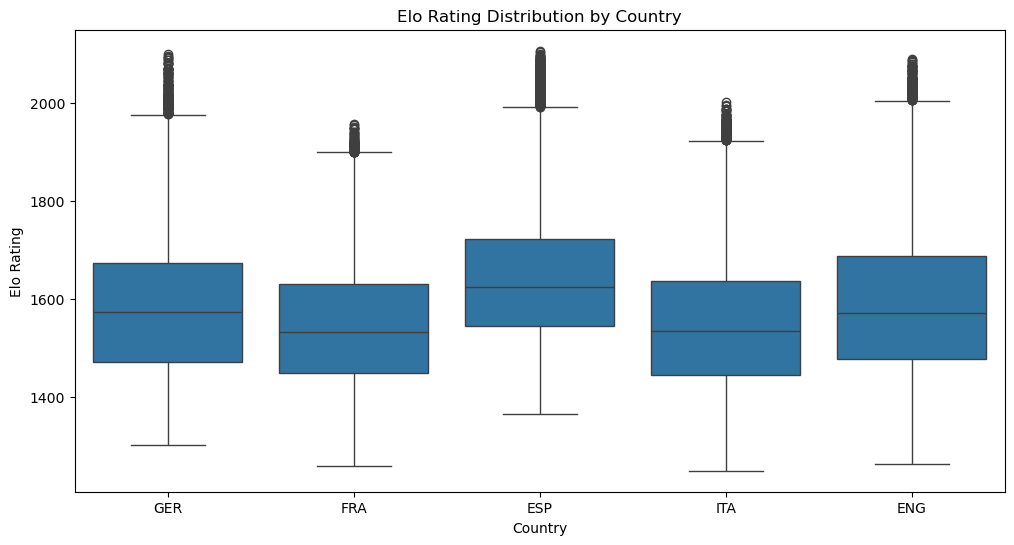

In [79]:
countries = ['GER', 'ENG', 'ESP', 'FRA', 'ITA']
filtered_data = elorating[elorating['country'].isin(countries)]
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_data['country'], y=filtered_data['elo'])
plt.title('Elo Rating Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Elo Rating')
plt.show()


## Average Elo Rating Over Time

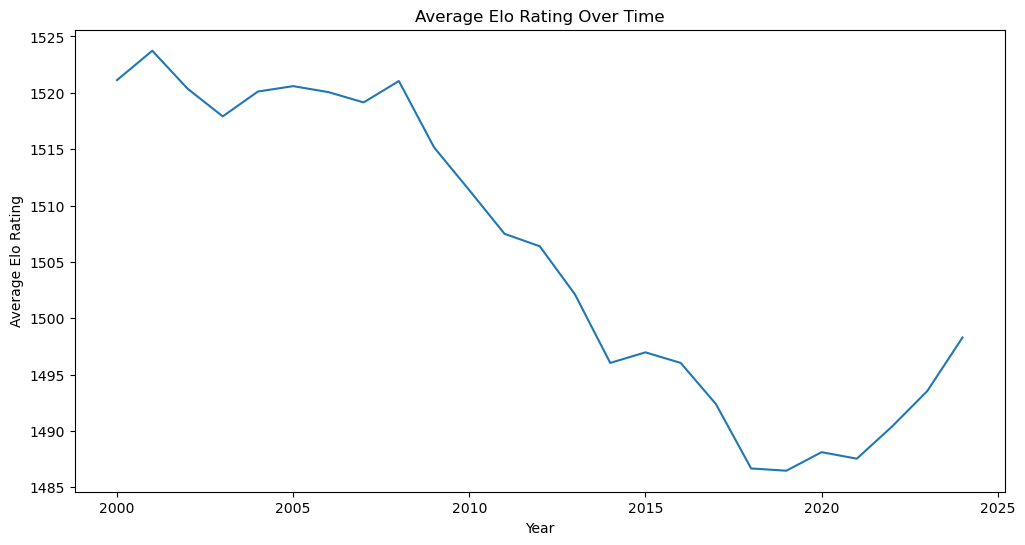

In [81]:
elorating['year'] = elorating['date'].dt.year
avg_elo_by_year = elorating.groupby('year')['elo'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_elo_by_year.index, y=avg_elo_by_year.values)
plt.title('Average Elo Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Elo Rating')
plt.show()

## Distribution of Match Results¶


Distribution of Match Results:
FTResult
H          101225
A           65369
D           60158
Unknown         3
Name: count, dtype: int64


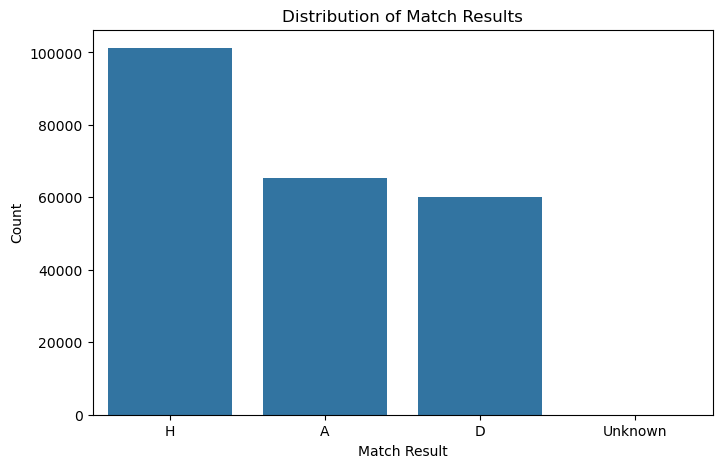

In [91]:
match_results = matches_cleaned['FTResult'].value_counts()
print("\nDistribution of Match Results:")
print(match_results)

plt.figure(figsize=(8, 5))
sns.countplot(data=matches_cleaned, x='FTResult', order=match_results.index)
plt.title('Distribution of Match Results')
plt.xlabel('Match Result')
plt.ylabel('Count')
plt.show()

## Top Teams by Average Home Elo Rating


Top 10 Home Teams by Average Elo Rating:
                   HomeElo      AwayElo
HomeTeam                               
Barcelona      1962.996446  1731.355194
Real Madrid    1959.919434  1731.728643
Bayern Munich  1926.630420  1674.464840
Man United     1888.780716  1718.805618
Chelsea        1879.792854  1721.396885
Liverpool      1872.937729  1720.579782
Arsenal        1869.890459  1717.520502
Juventus       1853.904922  1642.854257
Man City       1836.266458  1710.033261
Ath Madrid     1833.837020  1722.683138


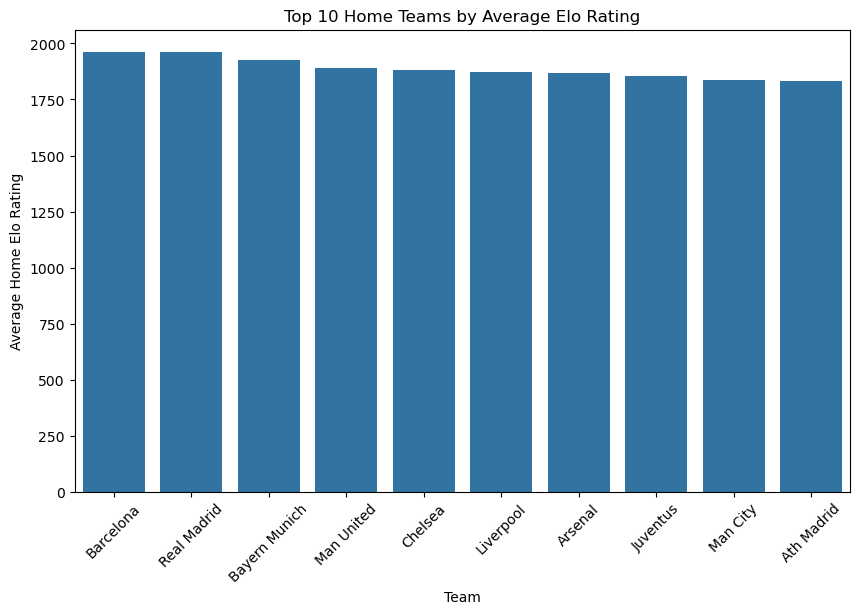

In [95]:
avg_elo = matches_cleaned.groupby('HomeTeam')[['HomeElo', 'AwayElo']].mean()
top_10_home_teams = avg_elo.sort_values(by='HomeElo', ascending=False).head(10)
print("\nTop 10 Home Teams by Average Elo Rating:")
print(top_10_home_teams)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_home_teams.index, y=top_10_home_teams['HomeElo'])
plt.title('Top 10 Home Teams by Average Elo Rating')
plt.xlabel('Team')
plt.ylabel('Average Home Elo Rating')
plt.xticks(rotation=45)
plt.show()

# Average Yellow and Red Cards per Match


Average Yellow and Red Cards per Match:
HomeYellow    0.855677
AwayYellow    1.009627
HomeRed       0.043911
AwayRed       0.059738
dtype: float64


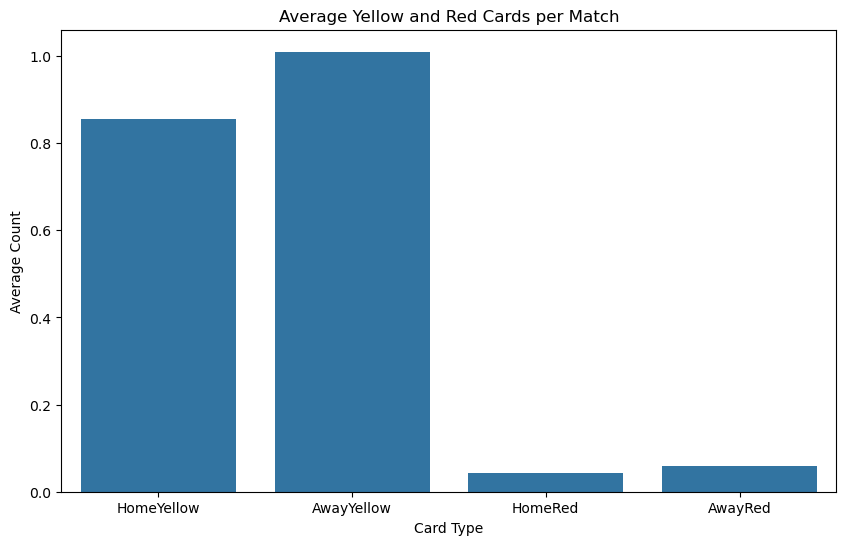

In [82]:
avg_cards = matches_cleaned[['HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed']].mean()
print("\nAverage Yellow and Red Cards per Match:")
print(avg_cards)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_cards.index, y=avg_cards.values)
plt.title('Average Yellow and Red Cards per Match')
plt.xlabel('Card Type')
plt.ylabel('Average Count')
plt.show()

# Average Betting Odds


Average Betting Odds:
OddHome    2.426302
OddDraw    3.560147
OddAway    3.965644
dtype: float64


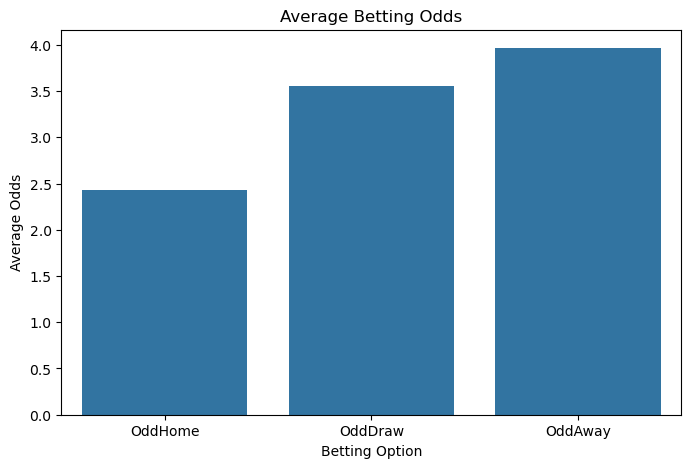

In [99]:
avg_odds = matches_cleaned[['OddHome', 'OddDraw', 'OddAway']].mean()
print("\nAverage Betting Odds:")
print(avg_odds)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_odds.index, y=avg_odds.values)
plt.title('Average Betting Odds')
plt.xlabel('Betting Option')
plt.ylabel('Average Odds')
plt.show()

## Average Handicap Values


Average Handicap Values:
HandiSize   -0.204721
HandiHome    1.292367
HandiAway    1.316372
dtype: float64


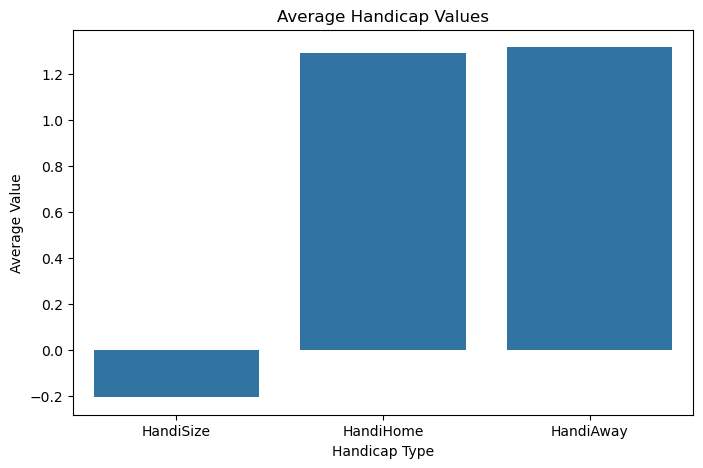

In [109]:
avg_handicap = matches_cleaned[['HandiSize', 'HandiHome', 'HandiAway']].mean()
print("\nAverage Handicap Values:")
print(avg_handicap)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_handicap.index, y=avg_handicap.values)
plt.title('Average Handicap Values')
plt.xlabel('Handicap Type')
plt.ylabel('Average Value')
plt.show()

## Average Over/Under 2.5 Goals Odds


Average Over/Under 2.5 Goals Odds:
Over25     1.240335
Under25    1.205598
dtype: float64


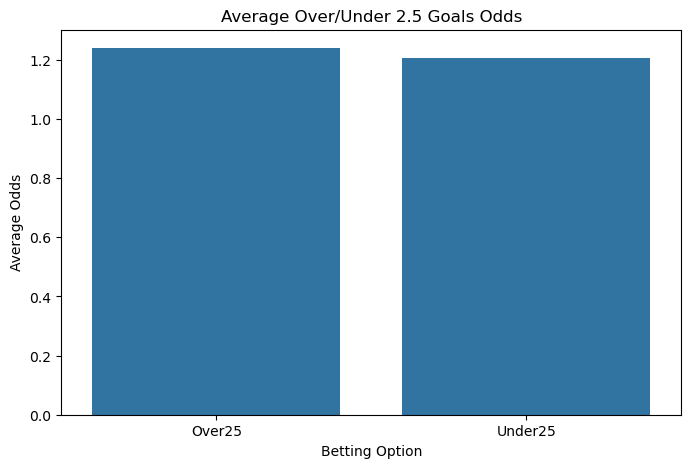

In [112]:
avg_over_under = matches_cleaned[['Over25', 'Under25']].mean()
print("\nAverage Over/Under 2.5 Goals Odds:")
print(avg_over_under)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_over_under.index, y=avg_over_under.values)
plt.title('Average Over/Under 2.5 Goals Odds')
plt.xlabel('Betting Option')
plt.ylabel('Average Odds')
plt.show()